In [1]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from matplotlib.offsetbox import AnchoredText


sns.set(rc={'figure.figsize':(6,6)}, font_scale=1.3)

In [2]:
df = pd.read_csv("geometric_measurements.csv")

df["oto_vol_mm"] = df["oto_vol_pix"] * (df["voxel_size_um"] / 1000 * 1/df["omega"])**3
df["oto_sa_mm"] = df["oto_sa_pix"] * (df["voxel_size_um"] / 1000 * 1/df["omega"])**2

df["sul_vol_mm"] = df["sul_vol_pix"] * (df["voxel_size_um"] / 1000 * 1/df["omega"])**3
df["sul_sa_mm"] = df["sul_sa_pix"] * (df["voxel_size_um"] / 1000 * 1/df["omega"])**2

df["perc_difference"]  = abs(df["oto_vol_mm"] - df["oto_vol_mm_bc"]) / ((df["oto_vol_mm"] + df["oto_vol_mm_bc"])/2) * 100

In [3]:
def get_r2(x, y, func, popt):
    residuals = y - func(x, *popt)
    ss_res = np.sum(residuals**2)
    ss_tot = np.sum((y - np.mean(y))**2)
    return 1 - (ss_res / ss_tot)

def f_exp(x, a, b):
    return a * x ** b

def f_lin(x, a, b):
    return a * x + b

def fit_func(x, y, func):
    popt, pcov = curve_fit(func, x, y, [1,0])
    return popt, get_r2(x, y, func, popt)

## SURFACE AREA

In [4]:
df[["sul_sa_mm", "oto_sa_mm", "gender"]]

,sul_sa_mm,oto_sa_mm,gender
0,0.813103,3.238184,I
1,3.656540,12.722334,I
2,6.316100,19.517147,I
3,5.429831,18.909313,I
4,7.567647,25.642497,I
5,7.947489,30.122124,I
6,10.345669,45.293514,F
7,10.700567,45.418980,M
8,12.460682,52.744163,F
9,11.098271,58.062767,M


## TL vs SSA

$y = 0.001997x^{1.7086}$


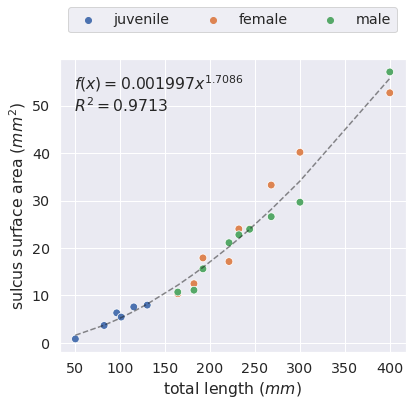

In [5]:
x_name = "fish_length_mm"
y_name = "sul_sa_mm"

x = df[x_name]
y = df[y_name]

popt, r2 = fit_func(x, y, f_exp)

r2 = np.round(r2, 4)

a = np.round(popt[0], 6)
b = np.round(popt[1], 4)

plt.plot(x, f_exp(x, *popt), "k--", alpha=0.5)

print("$y = %sx^{%s}$" % (a, b))

anc = AnchoredText("$f(x) = %sx^{%s}$ \n$R^2 = %s$" % (a, b, r2), loc="upper left", frameon=False)

ax = sns.scatterplot(x=x_name, y=y_name, hue=df["gender"].to_list(), data=df, s=60)
ax.set(xlabel="total length ($mm$)", ylabel="sulcus surface area ($mm^2$)")
ax.add_artist(anc)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["juvenile", "female", "male"], loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=3)

plt.tight_layout()
plt.savefig("figures/tl_ssa.png")

## TL vs OSA

$y = 0.010462x^{1.6639}$


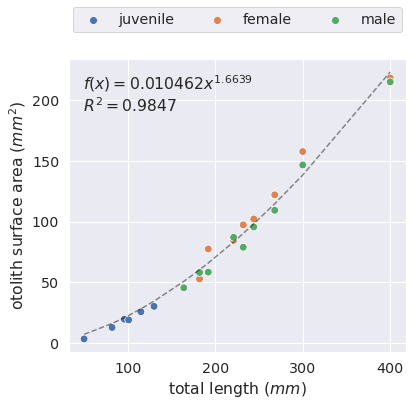

In [6]:
x_name = "fish_length_mm"
y_name = "oto_sa_mm"

x = df[x_name]
y = df[y_name]

popt, r2 = fit_func(x, y, f_exp)

r2 = np.round(r2, 4)

a = np.round(popt[0], 6)
b = np.round(popt[1], 4)

plt.plot(x, f_exp(x, *popt), "k--", alpha=0.5)

print("$y = %sx^{%s}$" % (a, b))

anc = AnchoredText("$f(x) = %sx^{%s}$ \n$R^2 = %s$" % (a, b, r2), loc="upper left", frameon=False)

ax = sns.scatterplot(x=x_name, y=y_name, hue=df["gender"].to_list(), data=df, s=60)
ax.set(xlabel="total length ($mm$)", ylabel="otolith surface area ($mm^2$)")
ax.add_artist(anc)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["juvenile", "female", "male"], loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=3)

plt.tight_layout()
plt.savefig("figures/tl_osa.png")

## SSA vs OSA

[3.96361918 2.11077852] 0.9759819220645342
$y = 3.96x+2.11$


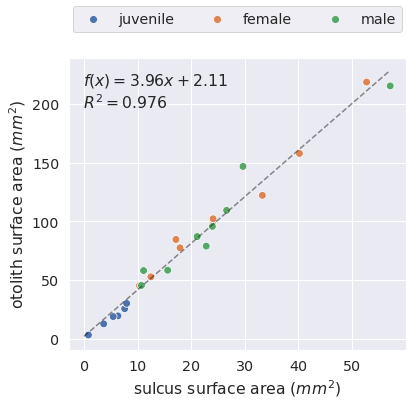

In [7]:
x_name = "sul_sa_mm"
y_name = "oto_sa_mm"

x = df[x_name]
y = df[y_name]

popt, r2 = fit_func(x, y, f_lin)
print(popt, r2)

r2 = np.round(r2, 4)

a = np.round(popt[0], 2)
b = np.round(popt[1], 2)

xn = np.arange(0, np.max(x))
plt.plot(xn, f_lin(xn, *popt), "k--", alpha=0.5)

print("$y = %sx+%s$" % (a, b))

anc = AnchoredText("$f(x) = %sx+%s$ \n$R^2 = %s$" % (a, b, r2), loc="upper left", frameon=False)

ax = sns.scatterplot(x=x_name, y=y_name, hue=df["gender"].to_list(), data=df, s=60)
ax.set(xlabel="sulcus surface area ($mm^2$)", ylabel="otolith surface area ($mm^2$)")
ax.add_artist(anc)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["juvenile", "female", "male"], loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=3)
plt.tight_layout()
plt.savefig("figures/ssa_osa.png")

## TL vs SSA:OSA

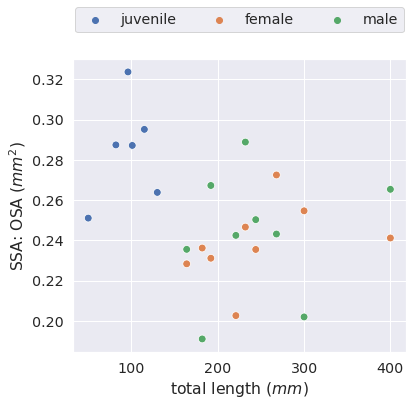

In [8]:
df["sa_ratio"] = df["sul_sa_mm"] / df["oto_sa_mm"]

ax = sns.scatterplot(x="fish_length_mm", y="sa_ratio", hue=df["gender"].to_list(), data=df, s=60)
ax.set(xlabel="total length ($mm$)", ylabel="SSA: OSA ($mm^2$)")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["juvenile", "female", "male"], loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=3)
plt.tight_layout()
plt.savefig("figures/tl_ssaosa.png")

## Boxplot (gender)

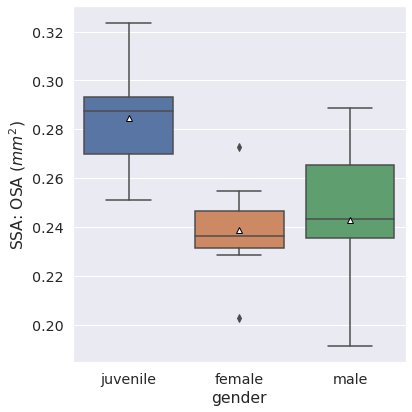

In [9]:
ax = sns.boxplot(x="gender", y="sa_ratio", data=df, showmeans=True, meanprops={"markerfacecolor":"white", "markeredgecolor":"black"})
ax.set(xlabel="gender", ylabel="SSA: OSA ($mm^2$)")
ax.set_xticklabels(["juvenile", "female", "male"])
plt.tight_layout()
plt.savefig("figures/bp_gender_ssaosa.png")

## VOLUME

In [10]:
df[["sul_vol_mm", "oto_vol_mm", "gender"]]

,sul_vol_mm,oto_vol_mm,gender
0,0.004722,0.240399,I
1,0.054162,1.604376,I
2,0.117171,3.047191,I
3,0.094583,3.097379,I
4,0.136388,4.640999,I
5,0.124330,5.707986,I
6,0.206552,8.879909,F
7,0.190807,9.589815,M
8,0.258921,10.385597,F
9,0.217424,11.182609,M


## TL vs SV

$y = 1e-06x^{2.4352}$


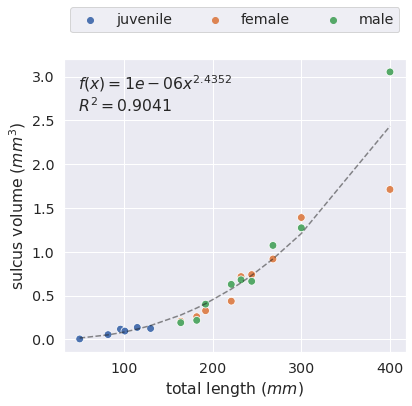

In [11]:
x_name = "fish_length_mm"
y_name = "sul_vol_mm"

x = df[x_name]
y = df[y_name]

popt, r2 = fit_func(x, y, f_exp)

r2 = np.round(r2, 4)

a = np.round(popt[0], 6)
b = np.round(popt[1], 4)

plt.plot(x, f_exp(x, *popt), "k--", alpha=0.5)

print("$y = %sx^{%s}$" % (a, b))

anc = AnchoredText("$f(x) = %sx^{%s}$ \n$R^2 = %s$" % (a, b, r2), loc="upper left", frameon=False)

ax = sns.scatterplot(x=x_name, y=y_name, hue=df["gender"].to_list(), data=df, s=60)
ax.set(xlabel="total length ($mm$)", ylabel="sulcus volume ($mm^3$)")
ax.add_artist(anc)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["juvenile", "female", "male"], loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=3)

plt.tight_layout()
plt.savefig("figures/tl_sv.png")

## TL vs OV

$y = 7.2e-05x^{2.318}$


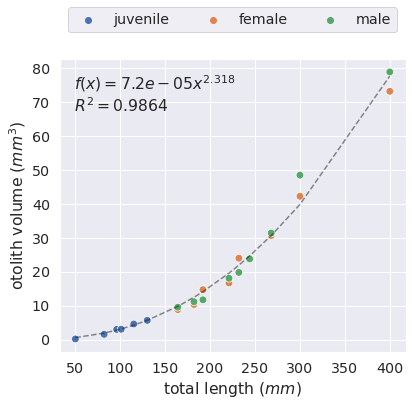

In [12]:
x_name = "fish_length_mm"
y_name = "oto_vol_mm"

x = df[x_name]
y = df[y_name]

popt, r2 = fit_func(x, y, f_exp)

r2 = np.round(r2, 4)

a = np.round(popt[0], 6)
b = np.round(popt[1], 4)

plt.plot(x, f_exp(x, *popt), "k--", alpha=0.5)

print("$y = %sx^{%s}$" % (a, b))

anc = AnchoredText("$f(x) = %sx^{%s}$ \n$R^2 = %s$" % (a, b, r2), loc="upper left", frameon=False)

ax = sns.scatterplot(x=x_name, y=y_name, hue=df["gender"].to_list(), data=df, s=60)
ax.set(xlabel="total length ($mm$)", ylabel="otolith volume ($mm^3$)")
ax.add_artist(anc)
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["juvenile", "female", "male"], loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=3)

plt.tight_layout()
plt.savefig("figures/tl_ov.png")

## SV vs OV

[29.15042715  2.75732957] 0.9260870164154327
$y = 29.15x+2.76$


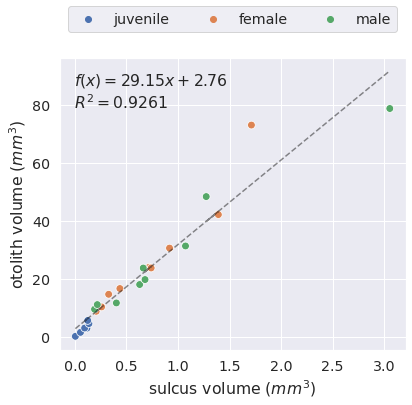

In [13]:
x_name = "sul_vol_mm"
y_name = "oto_vol_mm"

x = df[x_name]
y = df[y_name]

popt, r2 = fit_func(x, y, f_lin)
print(popt, r2)

r2 = np.round(r2, 4)

a = np.round(popt[0], 2)
b = np.round(popt[1], 2)

plt.plot(x, f_lin(x, *popt), "k--", alpha=0.5)

print("$y = %sx+%s$" % (a, b))

anc = AnchoredText("$f(x) = %sx+%s$ \n$R^2 = %s$" % (a, b, r2), loc="upper left", frameon=False)

ax = sns.scatterplot(x=x_name, y=y_name, hue=df["gender"].to_list(), data=df, s=60)
ax.set(xlabel="sulcus volume ($mm^3$)", ylabel="otolith volume ($mm^3$)")
ax.add_artist(anc)

handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["juvenile", "female", "male"], loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=3)

plt.tight_layout()
plt.savefig("/home/steven/scriptie/code/analysis/figures/sv_ov.png")

## TL vs SV:OV

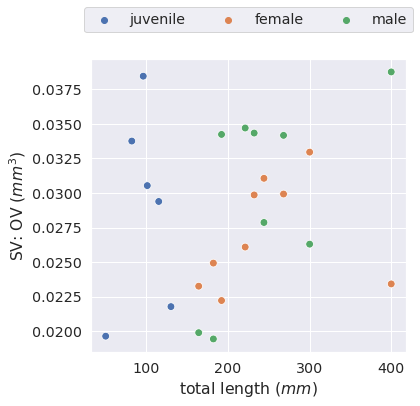

In [14]:
df["vol_ratio"] = df["sul_vol_mm"] / df["oto_vol_mm"]

ax = sns.scatterplot(x="fish_length_mm", y="vol_ratio", hue=df["gender"].to_list(), data=df, s=60)
ax.set(xlabel="total length ($mm$)", ylabel="SV: OV ($mm^3$)")
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles=handles, labels=["juvenile", "female", "male"], loc='upper center', bbox_to_anchor=(0.5, 1.2),
          ncol=3)
plt.tight_layout()
plt.savefig("figures/tl_svov.png")

## Boxplot (gender)

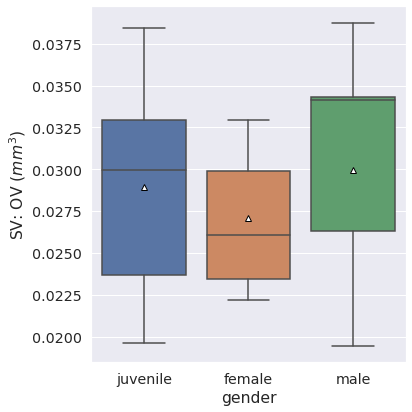

In [15]:
ax = sns.boxplot(x="gender", y="vol_ratio", data=df, showmeans=True, meanprops={"markerfacecolor":"white", "markeredgecolor":"black"})
ax.set(xlabel="gender", ylabel="SV: OV ($mm^3$)")
ax.set_xticklabels(["juvenile", "female", "male"])
plt.tight_layout()
plt.savefig("figures/bp_gender_svov.png")